In [7]:
RASPBERRY_PI = True
if RASPBERRY_PI:
    !pip install .
else:        
    !pip install git+https://github.com/madhuhegde/super_resolution.git

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Processing /home/raspberry/work/diffusion/super_resolution
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for latent_diffusion: filename=latent_diffusion-0.1.1.dev0-py3-none-any.whl size=54354 sha256=f37b0824c2b44fb2e9582a546fb31b0f87fca5e71438fc32767f0598340f161b
  Stored in directory: /tmp/pip-ephem-wheel-cache-uwrtksyl/wheels/8a/9e/fc/9606ee38d70ee0844f42ced02fbec880d989c648ff7679b130
Successfully built latent_diffusion
  Attempting uninstall: latent_diffusion
    Found existing installation: latent_diffusion 0.1.1.dev0
    Uninstalling latent_diffusion-0.1.1.dev0:
      Successfully uninstalled latent_diffusion-0.1.1.dev0


In [11]:
from latent_diffusion import LDMSuperResolutionPipeline
import torch

# load model 
pipeline = LDMSuperResolutionPipeline() 


ResnetBlock2D(
  (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
  (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (nonlinearity): SiLU()
)
ResnetBlock2D(
  (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
  (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 256, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (nonlinearity): SiLU()
  (conv_shortcut): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
)
ResnetBlock2D(
  (norm1): GroupNorm(32, 256, eps=1e-06, affine=True)
  (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2): GroupNorm(32, 512, eps=1e-06, affine=True)
  (dropout): Dropout(p=0.

In [12]:
#set device
if RASPBERRY_PI:
   device = "cpu" #"cuda" if torch.cuda.is_available() else "cpu"
   PATH_VQVAE = "/home/raspberry/work/diffusion/VQ_model_dict.pt" 
   PATH_UNET = "/home/raspberry/work/diffusion/Unet_model_dict.pt"  
   pipeline.vqvae.load_state_dict(torch.load(PATH_VQVAE)) #,map_location=torch.device('cpu'))) 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET)) #, map_location=torch.device('cpu'))) 
else:
   PATH_VQVAE = "/Users/madhuhegde/work/diffusion/LDM/hf_vqvae_model.pt" #"VQ_model_dict.pt"
   PATH_UNET = "/Users/madhuhegde/work/diffusion/LDM/hf_unet_model.pt" 
   device = "cuda" if torch.cuda.is_available() else "cpu" 
   pipeline.vqvae.load_state_dict(torch.load(PATH_VQVAE)) 
   pipeline.unet.load_state_dict(torch.load(PATH_UNET)) 


pipeline.unet.to(device)
pipeline.vqvae.to(device)

VQModel(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1):

In [13]:
import requests
from PIL import Image

image  = Image.open("/home/raspberry/Downloads/kairu.jpg").convert("RGB")
#low_res_img  = Image.open("/home/raspberry/work/diffusion/cifar10-64/train/class1/img4.png").convert("RGB")
image = image.crop((0, 40, 463, 503))
down_size_img = image.resize((96, 96))

# run pipeline in inference (sample random noise and denoise)
super_res_image = pipeline(down_size_img, num_inference_steps=20, eta=1).images[0]
# save image
#super_res_image.save("ldm_generated_image.png")

100%|█████████████████████████████████████████████| 2/2 [00:16<00:00,  8.01s/it]
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may ha

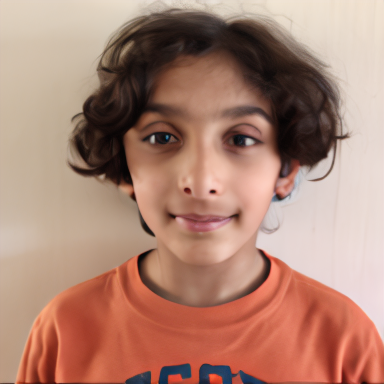

In [5]:
super_res_image 

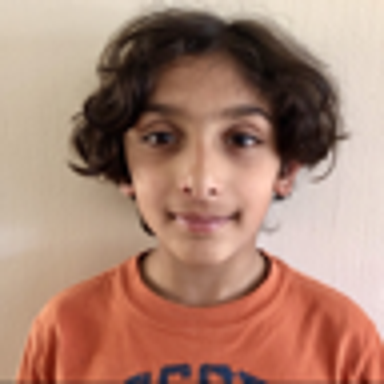

In [6]:
low_res_img = down_size_img.resize((96*4, 96*4))
low_res_img

In [12]:
image

(463, 463)